# Functional convergence analysis  

In [1]:
import pandas as pd
import seaborn as sns
import os 
import numpy as np
import matplotlib.pyplot as plt
from connectivity import weights as cweights
from connectivity import visualize as summary
from connectivity import data as cdata
import connectivity.constants as const
from statsmodels.stats.anova import AnovaRM

/Users/jdiedrichsen/Python/SUITPy/SUITPy/__init__.py:27: FutureWarning: Fetchers from the SUITPy.atlas module will be updated in later versions as new atlases become available
  "updated in later versions as new atlases become available", FutureWarning)
/Users/jdiedrichsen/.local/share/virtualenvs/cerebellum_connectivity-lV1BGCUV/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
# Import the relevant function from the scripts
import sys
sys.path.append('/Users/jdiedrichsen/Python/cerebellum_connectivity/connectivity/scripts')
from script_functional_convergence import *

## Matching criterion 
To judge whether the cerebellar parcels are matching cortical parcels, we are using a semi-non-negative matrix factorization on the response profiles for sc1 and sc2 combined. 
$$
Y=U^{+}V
$$
The decomposition uses an L1 penalty on the code (U). We are using dict_learning from sklearn as the basic learning mechanism. 

We then try to judge functional convergence by estimating the angle between the functional vectors extracted for regions A to all the vectors in a region B. Our evaluation criterion is taht we find the closest correspondence for each vector in A in B, and then average those maximal correlations across the vectors in A. Of course we can also evaluate the maximal correlation for each vector in A seperately. 

$$
vmatch = \frac{1}{N_A} \sum_i \max_j \mathbf{v}_{A,i}^T  \mathbf{v}_{B,j}
$$


### IID simulations

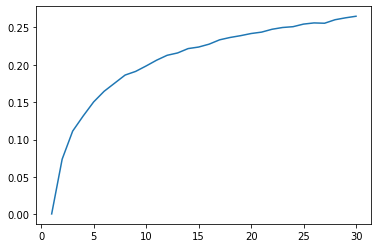

In [3]:
# This simulation shows that the average angle between items increases 
# as the number of vectors in the comparision group vmatch(A,B) increases 
kmax= 30
vm = np.empty((kmax,))
kk = np.arange(1,kmax+1)
for k in kk:
    vm[k-1] = vmatch_baseline([10,k],60)
plt.plot(kk,vm)


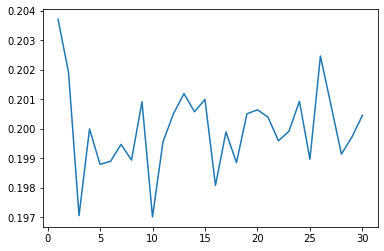

In [4]:
# The average angle is not influenced by the number of vectors 
# in the A group
kmax= 30
vm = np.empty((kmax,))
kk = np.arange(1,kmax+1)
for k in kk:
    vm[k-1] = vmatch_baseline([k,10],60)
plt.plot(kk,vm)


## Simulations with Gaussian data and different Covariance structures

## Overall correspondence between cerebellar and cortical reconstructions
We can now check the alignment between two structures by testing the alignment BETWEEN subjects either from one structure to itself 

A-A vs A-B  t:3.03 p:0.00593
A-A vs B-A  t:-1.26 p:0.219
B-B vs B-A  t:26.5 p:9.5e-19
B-B vs A-B  t:16.7 p:2.44e-14


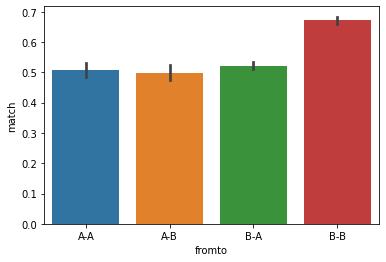

In [9]:
# Alignement cerebellum10 (A) to Cortex10 (B)
check_alignment(roi=["cerebellum_suit","tessels1002"],K=[10,10])

A-A vs A-B  t:-6.78 p:6.52e-07
A-A vs B-A  t:0.329 p:0.745
B-B vs B-A  t:32.1 p:1.36e-20
B-B vs A-B  t:11.5 p:4.91e-11


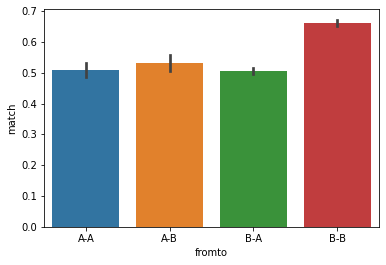

In [10]:
# Alignement cerebellum10 (A) to Cortex17 (B)
check_alignment(roi=["cerebellum_suit","tessels1002"],K=[10,17])

A-A vs A-B  t:-13.2 p:3.19e-12
A-A vs B-A  t:16.1 p:4.96e-14
B-B vs B-A  t:33.5 p:5.06e-21
B-B vs A-B  t:-11.6 p:4.28e-11


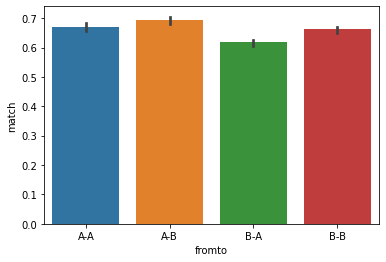

In [7]:
# Alignement cerebellum10 (A) to Cortex10 (B)
check_alignment(roi=["tessels1002","tessels1002"],K=[10,17])